# Titanic Survival Prediction Portfolio

**Author:** David Steven Henao  
**Date:** September 23, 2025

---
This portfolio documents the complete process for tackling the classic Kaggle challenge: predicting Titanic passenger survival. It includes exploratory analysis, visualization, preprocessing, model training, and generation of final predictions.
---

## 1. Introduction

- **Objective:** Apply data science techniques to identify factors influencing survival and build a predictive model.
- **Motivation:** The Titanic dataset is widely used for learning exploratory data analysis, feature engineering, modeling, and communicating results.
---

## 2. Import Libraries and Load Data

Import the essential libraries for data analysis in Python and load the `train.csv` and `test.csv` files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Data Preview

In [3]:
display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Initial Exploration and Missing Values

In [4]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Initial Visualizations to Understand the Problem and Objectives

The following charts help us understand the prediction challenge and initial factors:
- **Distribution of survivors vs non-survivors:** Shows dataset imbalance and the importance of proper evaluation metrics.
- **Survival by gender:** Reveals whether gender influenced survival chances.
- **Survival by passenger class:** Indicates the impact of social status on survival probabilities.

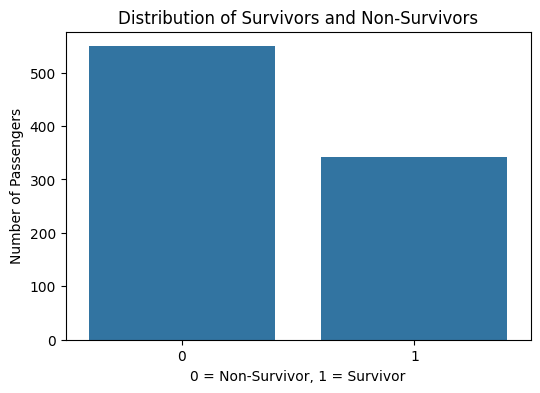

In [5]:
# 1. Bar plot: Survivors vs Non-Survivors
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Survived')
plt.title('Distribution of Survivors and Non-Survivors')
plt.xlabel('0 = Non-Survivor, 1 = Survivor')
plt.ylabel('Number of Passengers')
plt.show()

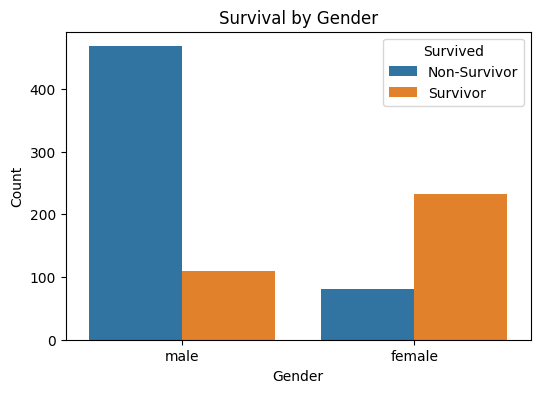

In [6]:
# 2. Bar plot: Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Non-Survivor', 'Survivor'])
plt.show()

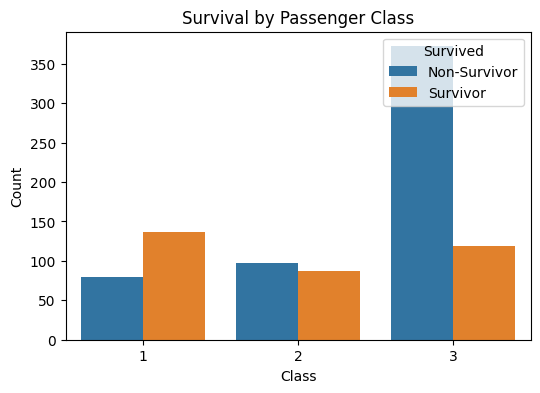

In [7]:
# 3. Bar plot: Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Non-Survivor', 'Survivor'])
plt.show()

## 4. Exploratory Data Analysis (EDA)

Visualize and analyze other relevant variables.

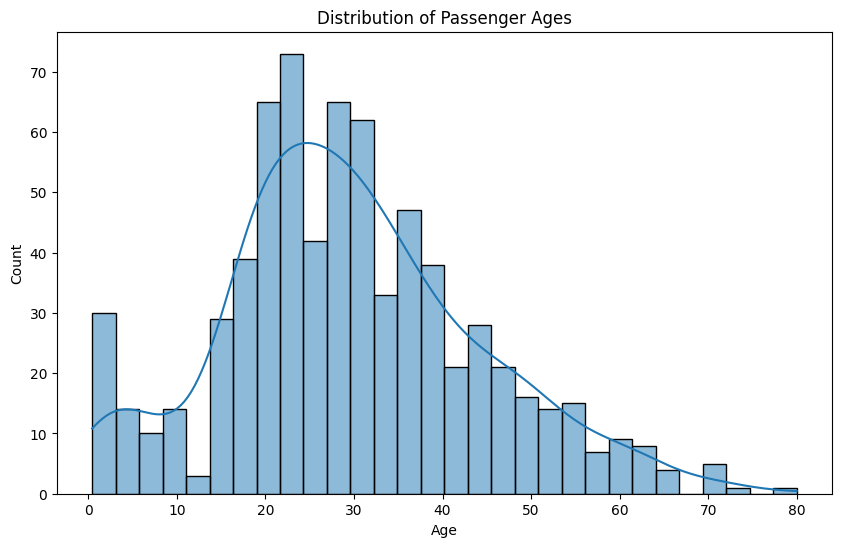

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.show()

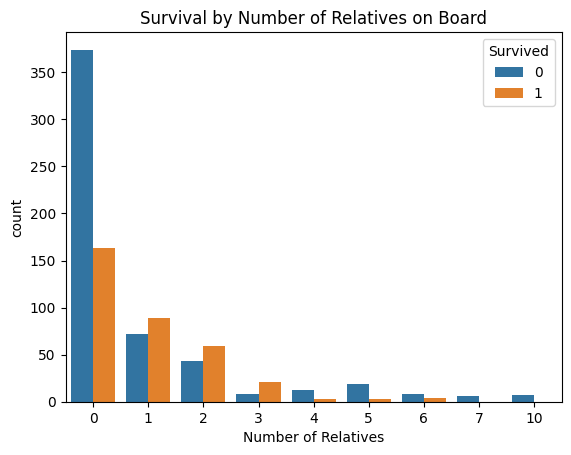

In [9]:
train['Family'] = train['SibSp'] + train['Parch']
sns.countplot(data=train, x='Family', hue='Survived')
plt.title('Survival by Number of Relatives on Board')
plt.xlabel('Number of Relatives')
plt.show()

## 5. Data Preprocessing

Handle missing values, encode categorical variables, and select features.

In [10]:
# Encode gender
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Embarked
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [14]:
# Impute missing values
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(train['Age'].median())
test['Fare'] = test['Fare'].fillna(train['Fare'].median())

In [15]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = train[features]
y = train['Survived']
X_test = test[features]

## 6. Modeling and Prediction

We use a simple decision tree model for prediction.

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

# Export predictions
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

## 7. Conclusions and Next Steps

- The entire data science cycle was practiced: analysis, visualization, preprocessing, and modeling.
- The decision tree is an initial approach; it is recommended to explore models such as Random Forest, Logistic Regression, and hyperparameter tuning.
- Performing cross-validation and analyzing feature importance can improve results.

**Suggested next steps:**
- Try other algorithms
- Implement cross-validation
- Engineer new features
- Document the process and findings

---

### Thank you for reviewing this portfolio!
Contact: stevenhenao018 (GitHub)